In [18]:
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import model_from_json

### Original Model

In [2]:
model_path = 'onnx-to-keras-master/original_model.h5'
model_orig = keras.models.load_model(model_path)

In [3]:
model_orig.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 288, 832, 3)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (1, 288, 832, 16)    2368        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu (ReLU)                    (1, 288, 832, 16)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (1, 288, 832, 16)    2320        re_lu[0][0]                      
_______________________________________________________________________________________

conv2d_transpose_666 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][26]       
__________________________________________________________________________________________________
conv2d_transpose_667 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][27]       
__________________________________________________________________________________________________
conv2d_transpose_668 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][28]       
__________________________________________________________________________________________________
conv2d_transpose_669 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][29]       
__________________________________________________________________________________________________
conv2d_transpose_670 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][30]       
__________________________________________________________________________________________________
conv2d_tra

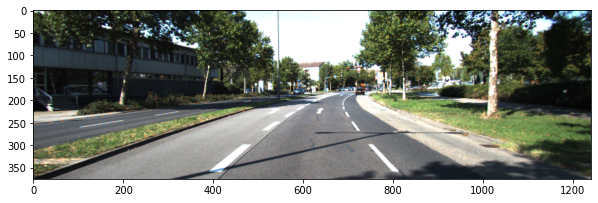

In [4]:
img_path = '000038.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [5]:
img = cv2.resize(img, (832, 288))
img_test = np.array([img/255])
print(img_test.shape)
print(np.amin(img_test), np.amax(img_test))

(1, 288, 832, 3)
0.0 1.0


In [159]:
output = model_orig.predict(img_test)

In [160]:
output_ = output[0]
output_np = np.array(output_[0])
print(output_np.shape)

(72, 208, 1)


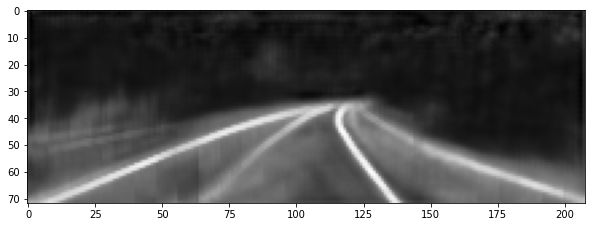

In [161]:
plt.figure(figsize=(10,8))
plt.imshow(output_np, cmap='gray')
plt.show()

### Cloned Model

In [101]:
model = keras.models.clone_model(model_orig)
model.set_weights(model_orig.get_weights())
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 288, 832, 3)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (1, 288, 832, 16)    2368        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu (ReLU)                    (1, 288, 832, 16)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (1, 288, 832, 16)    2320        re_lu[0][0]                      
_______________________________________________________________________________________

conv2d_transpose_650 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][10]       
__________________________________________________________________________________________________
conv2d_transpose_651 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][11]       
__________________________________________________________________________________________________
conv2d_transpose_652 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][12]       
__________________________________________________________________________________________________
conv2d_transpose_653 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][13]       
__________________________________________________________________________________________________
conv2d_transpose_654 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][14]       
__________________________________________________________________________________________________
conv2d_tra

In [102]:
output = model.predict(img_test)
output_ = output[0]
output_np = np.array(output_[0])
print(output_np.shape)

(72, 208, 1)


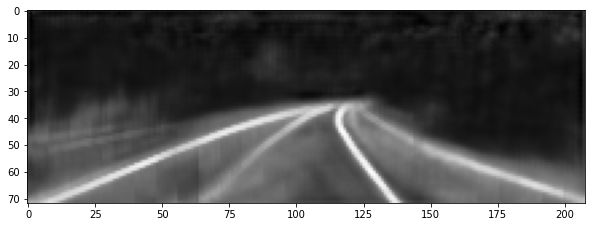

In [103]:
plt.figure(figsize=(10,8))
plt.imshow(output_np, cmap='gray')
plt.show()

### Find Filters with Zeros

In [104]:
layers = model.layers

In [139]:
cnt=0
for i in range(len(model.layers)):
    layer = model.layers[i]
    orig_layer_name = layer.name
    if 'conv2d' in layer.name:
        if 'transpose' not in layer.name:
            orig_conv_layer = model.get_layer(orig_layer_name)
            orig_conv_layer_weights = orig_conv_layer.get_weights()
            print(f'Layer {i} - Layer Name: {orig_layer_name}:', orig_conv_layer_weights[0].shape, orig_conv_layer_weights[1].shape)
            weights = orig_conv_layer_weights[0]
            cnt+=1
            if cnt == 27: break

Layer 1 - Layer Name: conv2d: (7, 7, 3, 16) (16,)
Layer 3 - Layer Name: conv2d_1: (3, 3, 16, 16) (16,)
Layer 6 - Layer Name: conv2d_2: (3, 3, 16, 32) (32,)
Layer 9 - Layer Name: conv2d_4: (3, 3, 32, 64) (64,)
Layer 12 - Layer Name: conv2d_5: (3, 3, 64, 64) (64,)
Layer 13 - Layer Name: conv2d_3: (1, 1, 32, 64) (64,)
Layer 16 - Layer Name: conv2d_6: (3, 3, 64, 64) (64,)
Layer 18 - Layer Name: conv2d_7: (3, 3, 64, 64) (64,)
Layer 22 - Layer Name: conv2d_8: (1, 1, 128, 64) (64,)
Layer 25 - Layer Name: conv2d_10: (3, 3, 64, 128) (128,)
Layer 28 - Layer Name: conv2d_11: (3, 3, 128, 128) (128,)
Layer 29 - Layer Name: conv2d_9: (1, 1, 64, 128) (128,)
Layer 32 - Layer Name: conv2d_12: (3, 3, 128, 128) (128,)
Layer 34 - Layer Name: conv2d_13: (3, 3, 128, 128) (128,)
Layer 38 - Layer Name: conv2d_14: (1, 1, 256, 128) (128,)
Layer 40 - Layer Name: conv2d_15: (3, 3, 128, 128) (128,)
Layer 42 - Layer Name: conv2d_16: (3, 3, 128, 128) (128,)
Layer 45 - Layer Name: conv2d_17: (3, 3, 128, 128) (128,)
L

In [140]:
print(weights.shape)

(3, 3, 256, 256)


In [142]:
num_filter = weights.shape[3]

values = []
cnt = 0
indices_zero = []
indices_ok = []

for f in range(num_filter):
    filter_ = weights[:,:,:,f]
    filter_abs = np.absolute(filter_)
    filter_abs_mean = np.mean(filter_abs)
    
    if filter_abs_mean == 0: 
        cnt+=1
        indices_zero.append(f)
    else:
        indices_ok.append(f)

    values.append(filter_abs_mean)
    
print(cnt)
print(values)

132
[0.0, 0.0, 0.0, 0.020088818, 0.019750379, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012748305, 0.019597664, 0.016988086, 0.025513502, 0.0, 0.0, 0.016899237, 0.022836851, 0.0, 0.02085319, 0.0, 0.016509, 0.0, 0.0, 0.0, 0.0, 0.021668248, 0.028225098, 0.029593894, 0.0, 0.0, 0.022056738, 0.018396245, 0.0, 0.0, 0.0, 0.0, 0.015639165, 0.022731913, 0.0, 0.01498994, 0.0, 0.017391505, 0.0, 0.0, 0.028544787, 0.0248859, 0.0, 0.0149854785, 0.01748586, 0.0, 0.0, 0.01687532, 0.0, 0.022263085, 0.020745486, 0.0, 0.019743748, 0.0, 0.0, 0.01459726, 0.0, 0.0, 0.024227738, 0.0, 0.0, 0.009710497, 0.02207709, 0.0, 0.023378588, 0.014051821, 0.0, 0.0, 0.022078034, 0.020479614, 0.018620167, 0.0, 0.0, 0.0, 0.018558659, 0.0, 0.0, 0.028215103, 0.0, 0.022080429, 0.0, 0.0, 0.0, 0.0, 0.0, 3e-45, 0.026342772, 0.0, 0.038349777, 0.022469528, 0.01939287, 0.0, 0.015492935, 0.0, 0.01953272, 0.022117998, 0.0, 0.0, 0.0, 3.4899383e-20, 0.011599269, 0.022504915, 0.020315515, 0.018587654, 0.009841359, 0.0, 0.027444107, 0.0, 0.017911883, 0

In [143]:
print(len(indices_zero))
print(indices_zero)

print(len(indices_ok))
print(indices_ok)

132
[0, 1, 2, 5, 6, 7, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 29, 30, 33, 34, 35, 36, 39, 41, 43, 44, 47, 50, 51, 53, 56, 58, 59, 61, 62, 64, 65, 68, 71, 72, 76, 77, 78, 80, 81, 83, 85, 86, 87, 88, 89, 92, 96, 98, 101, 102, 103, 110, 112, 115, 117, 119, 122, 123, 124, 125, 127, 129, 130, 137, 138, 139, 140, 142, 145, 148, 151, 152, 153, 154, 156, 158, 159, 162, 164, 165, 169, 173, 176, 177, 179, 182, 183, 186, 190, 191, 194, 196, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 215, 216, 218, 220, 221, 225, 227, 229, 231, 232, 234, 236, 237, 238, 239, 245, 246, 249, 252, 253]
124
[3, 4, 10, 11, 12, 13, 16, 17, 19, 21, 26, 27, 28, 31, 32, 37, 38, 40, 42, 45, 46, 48, 49, 52, 54, 55, 57, 60, 63, 66, 67, 69, 70, 73, 74, 75, 79, 82, 84, 90, 91, 93, 94, 95, 97, 99, 100, 104, 105, 106, 107, 108, 109, 111, 113, 114, 116, 118, 120, 121, 126, 128, 131, 132, 133, 134, 135, 136, 141, 143, 144, 146, 147, 149, 150, 155, 157, 160, 161, 163, 166, 167, 168, 170, 171, 172, 174, 175, 

### Prunning

In [95]:
layers = model.layers

In [96]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    orig_layer_name = layer.name
    if 'conv2d' in layer.name:
        if 'transpose' not in layer.name:
            print(f'Layer {i} - Layer Name: {orig_layer_name}')
            orig_conv_layer = model.get_layer(orig_layer_name)
            orig_conv_layer_weights = orig_conv_layer.get_weights()
            print(orig_conv_layer_weights[0].shape, orig_conv_layer_weights[1].shape)

Layer 1 - Layer Name: conv2d
(7, 7, 3, 16) (16,)
Layer 3 - Layer Name: conv2d_1
(3, 3, 16, 16) (16,)
Layer 6 - Layer Name: conv2d_2
(3, 3, 16, 32) (32,)
Layer 9 - Layer Name: conv2d_4
(3, 3, 32, 64) (64,)
Layer 12 - Layer Name: conv2d_5
(3, 3, 64, 64) (64,)
Layer 13 - Layer Name: conv2d_3
(1, 1, 32, 64) (64,)
Layer 16 - Layer Name: conv2d_6
(3, 3, 64, 64) (64,)
Layer 18 - Layer Name: conv2d_7
(3, 3, 64, 64) (64,)
Layer 22 - Layer Name: conv2d_8
(1, 1, 128, 64) (64,)
Layer 25 - Layer Name: conv2d_10
(3, 3, 64, 128) (128,)
Layer 28 - Layer Name: conv2d_11
(3, 3, 128, 128) (128,)
Layer 29 - Layer Name: conv2d_9
(1, 1, 64, 128) (128,)
Layer 32 - Layer Name: conv2d_12
(3, 3, 128, 128) (128,)
Layer 34 - Layer Name: conv2d_13
(3, 3, 128, 128) (128,)
Layer 38 - Layer Name: conv2d_14
(1, 1, 256, 128) (128,)
Layer 40 - Layer Name: conv2d_15
(3, 3, 128, 128) (128,)
Layer 42 - Layer Name: conv2d_16
(3, 3, 128, 128) (128,)
Layer 45 - Layer Name: conv2d_17
(3, 3, 128, 128) (128,)
Layer 47 - Layer Na

In [109]:
# Save weights and biases: Layer N
conv_layer = model.get_layer("conv2d_26")
conv_layer_weights = conv_layer.get_weights()
print(conv_layer_weights[0].shape)
print(conv_layer_weights[1].shape)
print(conv_layer_weights)

(3, 3, 256, 256)
(256,)
[array([[[[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
          -0.00000000e+00,  6.01811847e-03, -1.16177481e-02],
         [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e+00, -3.41517888e-02, -3.06286365e-02],
         [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
          -0.00000000e+00, -8.28953169e-04, -3.30392718e-02],
         ...,
         [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
          -0.00000000e+00,  4.36056638e-03, -4.03695144e-02],
         [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e+00, -2.44582634e-41, -3.19243816e-41],
         [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
          -0.00000000e+00,  1.03855068e-02, -5.26002534e-02]],

        [[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e+00, -2.44203750e-02, -2.63831094e-02],
         [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ..

In [110]:
# Save weights and biases: Layer N+1
conv_layer_1 = model.get_layer("conv2d_27")
conv_layer_1_weights = conv_layer_1.get_weights()
print(conv_layer_1_weights[0].shape)
print(conv_layer_1_weights[1].shape)
print(conv_layer_1_weights)

(3, 3, 256, 256)
(256,)
[array([[[[ 2.8090579e-33, -8.9227574e-33,  1.7497924e-34, ...,
          -1.8504976e-33, -0.0000000e+00, -2.5283222e-39],
         [ 1.3970946e-41,  3.6700007e-42,  2.2081661e-41, ...,
          -1.9297281e-41, -0.0000000e+00,  1.8216880e-44],
         [-1.1322492e-42,  2.7929280e-41,  3.7807033e-42, ...,
          -2.9048917e-42, -0.0000000e+00, -1.2611686e-44],
         ...,
         [-4.5819545e-39, -4.6939183e-39, -2.1656514e-37, ...,
           1.1751067e-37, -0.0000000e+00, -2.6484541e-43],
         [ 4.2582419e-02, -1.0125404e-02, -7.6830173e-03, ...,
           3.2041775e-05,  0.0000000e+00, -4.2741647e-07],
         [ 9.0862513e-03,  2.4903443e-02, -5.8446336e-03, ...,
           4.4049984e-03, -0.0000000e+00, -1.7237461e-07]],

        [[ 5.4620583e-33, -5.7277314e-33,  1.2264712e-34, ...,
          -3.0312405e-33, -0.0000000e+00, -1.8271517e-39],
         [-1.7876365e-41,  2.1069924e-41,  1.6479270e-42, ...,
           2.7360353e-41, -0.0000000e+00, 

In [111]:
# SOLUTION 1: Select part to prun
remaining_channels = 128

# Layer N
orig_w = conv_layer_weights[0]
orig_b = conv_layer_weights[1]

temp_w = orig_w[:,:,:,0:remaining_channels]
temp_b = orig_b[0:remaining_channels]

print(temp_w.shape, temp_b.shape)


# Layer N+1
orig_w_1 = conv_layer_1_weights[0]
orig_b_1 = conv_layer_1_weights[1]

temp_w_1 = orig_w_1[:,:,0:remaining_channels,:]
temp_b_1 = orig_b_1

print(temp_w_1.shape, temp_b_1.shape)

(3, 3, 256, 128) (128,)
(3, 3, 128, 256) (256,)


In [146]:
# print(len(indices_ok))    
# print(indices_ok)    # indices of good filters

# SOLUTION 2: Prun with index
remaining_channels = len(indices_ok)

# Layer N
orig_w = conv_layer_weights[0]
orig_b = conv_layer_weights[1]

temp_w = orig_w[:,:,:,indices_ok]
temp_b = orig_b[indices_ok]

print(temp_w.shape, temp_b.shape)


# Layer N+1
orig_w_1 = conv_layer_1_weights[0]
orig_b_1 = conv_layer_1_weights[1]

temp_w_1 = orig_w_1[:,:,indices_ok,:]
temp_b_1 = orig_b_1

print(temp_w_1.shape, temp_b_1.shape)

(3, 3, 256, 124) (124,)
(3, 3, 124, 256) (256,)


In [131]:
a = np.random.rand(2,6)
print(a.shape)
print(a)

(2, 6)
[[0.69958338 0.15096034 0.0349621  0.29654557 0.58803828 0.72070526]
 [0.17974613 0.82391531 0.78727524 0.19862901 0.21541886 0.59108626]]


In [134]:
b = a[:, [0,1,3]]
print(b.shape)
print(b)

(2, 3)
[[0.69958338 0.15096034 0.29654557]
 [0.17974613 0.82391531 0.19862901]]


In [135]:
c = np.array([1,2,3,4,5])
d = c[[2,3]]
print(c)
print(d)

[1 2 3 4 5]
[3 4]


In [147]:
# Create new model
model.layers[70].filters = remaining_channels
new_model = model_from_json(model.to_json())
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 288, 832, 3)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (1, 288, 832, 16)    2368        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu (ReLU)                    (1, 288, 832, 16)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (1, 288, 832, 16)    2320        re_lu[0][0]                      
_______________________________________________________________________________________

conv2d_transpose_775 (Conv2DTra (1, 36, 104, 1)      4           tf_op_layer_split_7[0][7]        
__________________________________________________________________________________________________
conv2d_transpose_776 (Conv2DTra (1, 36, 104, 1)      4           tf_op_layer_split_7[0][8]        
__________________________________________________________________________________________________
conv2d_transpose_777 (Conv2DTra (1, 36, 104, 1)      4           tf_op_layer_split_7[0][9]        
__________________________________________________________________________________________________
conv2d_transpose_778 (Conv2DTra (1, 36, 104, 1)      4           tf_op_layer_split_7[0][10]       
__________________________________________________________________________________________________
conv2d_transpose_779 (Conv2DTra (1, 36, 104, 1)      4           tf_op_layer_split_7[0][11]       
__________________________________________________________________________________________________
conv2d_tra

In [148]:
for i in range(len(new_model.layers)):
    layer = new_model.layers[i]
    orig_layer_name = layer.name
    if 'conv2d' in layer.name:
        if 'transpose' not in layer.name:
            orig_conv_layer = new_model.get_layer(orig_layer_name)
            orig_conv_layer_weights = orig_conv_layer.get_weights()
            print(f'Layer {i} - Layer Name: {orig_layer_name}:', orig_conv_layer_weights[0].shape, orig_conv_layer_weights[1].shape)

Layer 1 - Layer Name: conv2d: (7, 7, 3, 16) (16,)
Layer 3 - Layer Name: conv2d_1: (3, 3, 16, 16) (16,)
Layer 6 - Layer Name: conv2d_2: (3, 3, 16, 32) (32,)
Layer 9 - Layer Name: conv2d_4: (3, 3, 32, 64) (64,)
Layer 12 - Layer Name: conv2d_5: (3, 3, 64, 64) (64,)
Layer 13 - Layer Name: conv2d_3: (1, 1, 32, 64) (64,)
Layer 16 - Layer Name: conv2d_6: (3, 3, 64, 64) (64,)
Layer 18 - Layer Name: conv2d_7: (3, 3, 64, 64) (64,)
Layer 22 - Layer Name: conv2d_8: (1, 1, 128, 64) (64,)
Layer 25 - Layer Name: conv2d_10: (3, 3, 64, 128) (128,)
Layer 28 - Layer Name: conv2d_11: (3, 3, 128, 128) (128,)
Layer 29 - Layer Name: conv2d_9: (1, 1, 64, 128) (128,)
Layer 32 - Layer Name: conv2d_12: (3, 3, 128, 128) (128,)
Layer 34 - Layer Name: conv2d_13: (3, 3, 128, 128) (128,)
Layer 38 - Layer Name: conv2d_14: (1, 1, 256, 128) (128,)
Layer 40 - Layer Name: conv2d_15: (3, 3, 128, 128) (128,)
Layer 42 - Layer Name: conv2d_16: (3, 3, 128, 128) (128,)
Layer 45 - Layer Name: conv2d_17: (3, 3, 128, 128) (128,)
L

In [153]:
#### COMPARE ####
# New Model Weights
conv_layer_new = new_model.get_layer("conv2d_26")
conv_layer_weights_new = conv_layer_new.get_weights()
print(conv_layer_weights_new[0].shape)
print(conv_layer_weights_new[1].shape)
print(conv_layer_weights_new)

(3, 3, 256, 124)
(124,)
[array([[[[-1.95773691e-02, -4.01513353e-02, -1.14349509e-02, ...,
           4.22412418e-02,  6.01811847e-03, -1.16177481e-02],
         [-7.80012645e-03, -1.75016373e-02, -1.90505832e-02, ...,
          -2.71878969e-02, -3.41517888e-02, -3.06286365e-02],
         [-4.20573726e-03, -9.46878828e-03,  1.72687769e-02, ...,
          -1.27439275e-02, -8.28953169e-04, -3.30392718e-02],
         ...,
         [-2.59541608e-02,  3.86423315e-03, -3.11146863e-02, ...,
          -2.99282130e-02,  4.36056638e-03, -4.03695144e-02],
         [-4.14462047e-41,  1.50709650e-41,  1.52853636e-41, ...,
           8.18638563e-42, -2.44582634e-41, -3.19243816e-41],
         [-1.62424911e-02,  4.13584933e-02,  2.12156270e-02, ...,
           8.12664703e-02,  1.03855068e-02, -5.26002534e-02]],

        [[-1.52532915e-02, -4.73425202e-02,  3.81601672e-03, ...,
           4.12082672e-02, -2.44203750e-02, -2.63831094e-02],
         [-1.71507671e-02, -4.41899663e-03, -2.62054782e-02, ..

In [154]:
# Original Model Weights
conv_layer_new = model.get_layer("conv2d_26")
conv_layer_weights_new = conv_layer_new.get_weights()
print(conv_layer_weights_new[0].shape)
print(conv_layer_weights_new[1].shape)
print(conv_layer_weights_new)

(3, 3, 256, 256)
(256,)
[array([[[[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
          -0.00000000e+00,  6.01811847e-03, -1.16177481e-02],
         [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e+00, -3.41517888e-02, -3.06286365e-02],
         [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
          -0.00000000e+00, -8.28953169e-04, -3.30392718e-02],
         ...,
         [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
          -0.00000000e+00,  4.36056638e-03, -4.03695144e-02],
         [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e+00, -2.44582634e-41, -3.19243816e-41],
         [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
          -0.00000000e+00,  1.03855068e-02, -5.26002534e-02]],

        [[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e+00, -2.44203750e-02, -2.63831094e-02],
         [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ..

In [151]:
# Set weights for Layer N and Layer N+1

conv_layer_temp = new_model.get_layer("conv2d_26")
conv_layer_temp.set_weights([temp_w, temp_b])

conv_layer_temp_1 = new_model.get_layer("conv2d_27")
conv_layer_temp_1.set_weights([temp_w_1, temp_b_1])

In [152]:
# Set weights for other layers

layers = model.layers
p_layers = new_model.layers

for i in range(len(model.layers)):
        
    layer = model.layers[i]
    layer_p = new_model.layers[i]

    orig_layer_name = layer.name
    prun_layer_name = layer_p.name

    if 'conv2d' in layer.name:
        
        if layer.name == 'conv2d_26' or layer.name == 'conv2d_27':
            donothing = True
            print(i)
            print(layer.name, 'No change!')
        
        else:
            print(i)
            print(orig_layer_name, "-", prun_layer_name)

            orig_conv_layer = model.get_layer(orig_layer_name)
            orig_conv_layer_weights = orig_conv_layer.get_weights()

            prun_conv_layer = new_model.get_layer(prun_layer_name)
            prun_conv_layer.set_weights(orig_conv_layer_weights)

1
conv2d - conv2d
3
conv2d_1 - conv2d_1
6
conv2d_2 - conv2d_2
9
conv2d_4 - conv2d_4
12
conv2d_5 - conv2d_5
13
conv2d_3 - conv2d_3
16
conv2d_6 - conv2d_6
18
conv2d_7 - conv2d_7
22
conv2d_8 - conv2d_8
25
conv2d_10 - conv2d_10
28
conv2d_11 - conv2d_11
29
conv2d_9 - conv2d_9
32
conv2d_12 - conv2d_12
34
conv2d_13 - conv2d_13
38
conv2d_14 - conv2d_14
40
conv2d_15 - conv2d_15
42
conv2d_16 - conv2d_16
45
conv2d_17 - conv2d_17
47
conv2d_18 - conv2d_18
52
conv2d_19 - conv2d_19
55
conv2d_21 - conv2d_21
58
conv2d_22 - conv2d_22
59
conv2d_20 - conv2d_20
62
conv2d_23 - conv2d_23
64
conv2d_24 - conv2d_24
68
conv2d_25 - conv2d_25
70
conv2d_26 No change!
72
conv2d_27 No change!
75
conv2d_28 - conv2d_28
77
conv2d_29 - conv2d_29
82
conv2d_30 - conv2d_30
85
conv2d_32 - conv2d_32
88
conv2d_33 - conv2d_33
89
conv2d_31 - conv2d_31
92
conv2d_34 - conv2d_34
94
conv2d_35 - conv2d_35
98
conv2d_36 - conv2d_36
100
conv2d_37 - conv2d_37
103
conv2d_transpose - conv2d_transpose
104
conv2d_transpose_1 - conv2d_transpo

326
conv2d_transpose_223 - conv2d_transpose_223
327
conv2d_transpose_224 - conv2d_transpose_224
328
conv2d_transpose_225 - conv2d_transpose_225
329
conv2d_transpose_226 - conv2d_transpose_226
330
conv2d_transpose_227 - conv2d_transpose_227
331
conv2d_transpose_228 - conv2d_transpose_228
332
conv2d_transpose_229 - conv2d_transpose_229
333
conv2d_transpose_230 - conv2d_transpose_230
334
conv2d_transpose_231 - conv2d_transpose_231
335
conv2d_transpose_232 - conv2d_transpose_232
336
conv2d_transpose_233 - conv2d_transpose_233
337
conv2d_transpose_234 - conv2d_transpose_234
338
conv2d_transpose_235 - conv2d_transpose_235
339
conv2d_transpose_236 - conv2d_transpose_236
340
conv2d_transpose_237 - conv2d_transpose_237
341
conv2d_transpose_238 - conv2d_transpose_238
342
conv2d_transpose_239 - conv2d_transpose_239
343
conv2d_transpose_240 - conv2d_transpose_240
344
conv2d_transpose_241 - conv2d_transpose_241
345
conv2d_transpose_242 - conv2d_transpose_242
346
conv2d_transpose_243 - conv2d_transp

515
conv2d_transpose_399 - conv2d_transpose_399
516
conv2d_transpose_400 - conv2d_transpose_400
517
conv2d_transpose_401 - conv2d_transpose_401
518
conv2d_transpose_402 - conv2d_transpose_402
519
conv2d_transpose_403 - conv2d_transpose_403
520
conv2d_transpose_404 - conv2d_transpose_404
521
conv2d_transpose_405 - conv2d_transpose_405
522
conv2d_transpose_406 - conv2d_transpose_406
523
conv2d_transpose_407 - conv2d_transpose_407
524
conv2d_transpose_408 - conv2d_transpose_408
525
conv2d_transpose_409 - conv2d_transpose_409
526
conv2d_transpose_410 - conv2d_transpose_410
527
conv2d_transpose_411 - conv2d_transpose_411
528
conv2d_transpose_412 - conv2d_transpose_412
529
conv2d_transpose_413 - conv2d_transpose_413
530
conv2d_transpose_414 - conv2d_transpose_414
531
conv2d_transpose_415 - conv2d_transpose_415
532
conv2d_transpose_416 - conv2d_transpose_416
533
conv2d_transpose_417 - conv2d_transpose_417
534
conv2d_transpose_418 - conv2d_transpose_418
535
conv2d_transpose_419 - conv2d_transp

781
conv2d_transpose_643 - conv2d_transpose_643
782
conv2d_transpose_644 - conv2d_transpose_644
783
conv2d_transpose_645 - conv2d_transpose_645
784
conv2d_transpose_646 - conv2d_transpose_646
785
conv2d_transpose_647 - conv2d_transpose_647
786
conv2d_transpose_648 - conv2d_transpose_648
787
conv2d_transpose_649 - conv2d_transpose_649
788
conv2d_transpose_650 - conv2d_transpose_650
789
conv2d_transpose_651 - conv2d_transpose_651
790
conv2d_transpose_652 - conv2d_transpose_652
791
conv2d_transpose_653 - conv2d_transpose_653
792
conv2d_transpose_654 - conv2d_transpose_654
793
conv2d_transpose_655 - conv2d_transpose_655
794
conv2d_transpose_656 - conv2d_transpose_656
795
conv2d_transpose_657 - conv2d_transpose_657
796
conv2d_transpose_658 - conv2d_transpose_658
797
conv2d_transpose_659 - conv2d_transpose_659
798
conv2d_transpose_660 - conv2d_transpose_660
799
conv2d_transpose_661 - conv2d_transpose_661
800
conv2d_transpose_662 - conv2d_transpose_662
801
conv2d_transpose_663 - conv2d_transp

conv2d_transpose_749 - conv2d_transpose_749
960
conv2d_transpose_750 - conv2d_transpose_750
961
conv2d_transpose_751 - conv2d_transpose_751
962
conv2d_transpose_752 - conv2d_transpose_752
963
conv2d_transpose_753 - conv2d_transpose_753
964
conv2d_transpose_754 - conv2d_transpose_754
965
conv2d_transpose_755 - conv2d_transpose_755
966
conv2d_transpose_756 - conv2d_transpose_756
967
conv2d_transpose_757 - conv2d_transpose_757
968
conv2d_transpose_758 - conv2d_transpose_758
969
conv2d_transpose_759 - conv2d_transpose_759
970
conv2d_transpose_760 - conv2d_transpose_760
971
conv2d_transpose_761 - conv2d_transpose_761
972
conv2d_transpose_762 - conv2d_transpose_762
973
conv2d_transpose_763 - conv2d_transpose_763
974
conv2d_transpose_764 - conv2d_transpose_764
975
conv2d_transpose_765 - conv2d_transpose_765
976
conv2d_transpose_766 - conv2d_transpose_766
977
conv2d_transpose_767 - conv2d_transpose_767
978
conv2d_48 - conv2d_48
984
conv2d_transpose_832 - conv2d_transpose_832
985
conv2d_transpo

In [155]:
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 288, 832, 3)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (1, 288, 832, 16)    2368        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu (ReLU)                    (1, 288, 832, 16)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (1, 288, 832, 16)    2320        re_lu[0][0]                      
_______________________________________________________________________________________

__________________________________________________________________________________________________
conv2d_transpose_664 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][24]       
__________________________________________________________________________________________________
conv2d_transpose_665 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][25]       
__________________________________________________________________________________________________
conv2d_transpose_666 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][26]       
__________________________________________________________________________________________________
conv2d_transpose_667 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][27]       
__________________________________________________________________________________________________
conv2d_transpose_668 (Conv2DTra (1, 72, 208, 1)      4           tf_op_layer_split_5[0][28]       
__________

In [156]:
output = new_model.predict(img_test)
output_ = output[0]
output_np = np.array(output_[0])
print(output_np.shape)

(72, 208, 1)


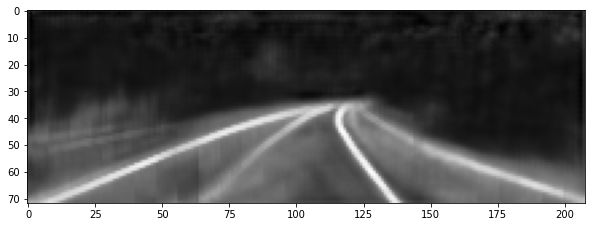

In [157]:
plt.figure(figsize=(10,8))
plt.imshow(output_np, cmap='gray')
plt.show()

In [166]:
new_model.save('prun_one_layer.h5')

In [158]:
prun_output = output_np.copy()

In [162]:
orig_output = output_np.copy()

In [163]:
diff = orig_output - prun_output

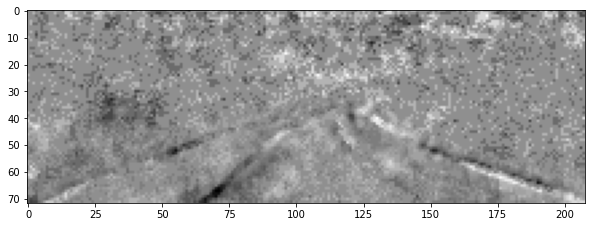

In [164]:
plt.figure(figsize=(10,8))
plt.imshow(diff, cmap='gray')
plt.show()

In [165]:
print(np.amin(diff), np.amax(diff))

-3.8146973e-06 2.9802322e-06
